In [1]:
from IPython.display import display, Math, Latex, HTML
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["figure.figsize"] = (5,5)
display(HTML("<h1>Л/Р №1, Степанов Илья, группа М32321</h1>"))
def matrix(x):
    s = "\\begin{pmatrix}"
    for i in x:
        s += str(i) + "\\\\"
    s += "\\end{pmatrix}"
    return s

def beautiful_matrix(points):
    s = ""
    for i in range(len(points)):
        if i % 5 == 0:
            s += "\\begin{align}"
            if i != 0:
                s += "\\rightarrow"
        s += matrix(points[i])
        if i != len(points) - 1:
            s += "\\rightarrow"
        if i % 5 == 4 or i == len(points) - 1:
            s += "\\end{align}"
    display(Latex(s))

def beautiful_function(a, b):
    if len(a) <= 3:
        s = 'F('
        for i in range(len(a)):
            s += 'x_' + str(i) + ', '
        s = s[:-2] + ') = '
    else:
        s = 'F(x_0, x_1, ..., x_' + str(len(a)-1) + ') ='
    for i in range(len(a)):
        if a[i] < 0:
            s += ' - '
        elif i != 0:
            s += ' + '
        if abs(a[i]) != 1:
            s += str(abs(a[i]))
        if b[i] != 0:
            s += '(x_' + str(i)
            if b[i] < 0:
                s += ' - '
            else:
                s += ' + '
            s += str(b[i]) + ')'
        else:
            s += 'x_' + str(i)
        s += '^2'
    display(Math(s))

# Точность измерений минимума
epsilon = 0.01
display(HTML("<h3>Точность измерений минимума: " + str(epsilon) + "</h3>"))

In [2]:
display(HTML("<h2>1. Реализация градиентного спуска:</h2>"))

In [3]:
def f(vector, a, b=None):
    if b is None:
        b = np.zeros(len(vector))
    result = 0
    for i in range(len(vector)):
        result += a[i] * (vector[i] + b[i]) ** 2
    return result

def grad(point, a, b=None):
    if b is None:
        b = np.zeros(len(point))
    result = np.zeros(len(point))
    for i in range(len(point)):
        result[i] = 2*a[i]*(point[i] + b[i])
    return result

def grad_desc(lr, epoch, a, b=None):
    global epsilon
    n = len(a) # Размерность пространства
    x = np.random.uniform(-10, 10, n)
    points = np.zeros((epoch, n))
    points[0] = x
    count = 0 # Количество вызовов градиента
    for i in range(1, epoch):
        x = x - lr * grad(x, a, b)
        count += 1
        points[i] = x
        if (points[i] - points[i-1]).all() < epsilon:
            break
    return count, points[:i+1]

In [4]:
display(HTML("<h2>2. Реализация градиентного спуска с методом одномерного поиска Фибоначчи:</h2>"))

In [13]:
def fib(n):
    return int(((1 + np.sqrt(5)) ** n - (1 - np.sqrt(5)) ** n) / (2 ** n * np.sqrt(5)))

def fib_search(coef_1, coef_2, a, b, par, l=0.1, eps=0.1):
    n = 10
    while fib(n) <= (b[par]-a[par])/l:
        n += 5
    la = a.copy()
    mu = b.copy()
    la[par] = a[par] + fib(n - 2) / fib(n) * (b[par] - a[par])
    mu[par] = a[par] + fib(n - 1) / fib(n) * (b[par] - a[par])
    f1, f2 = f(la, coef_1, coef_2), f(mu, coef_1, coef_2)
    count = 2
    for k in range(1, n-1):
        if f1 > f2:
            a = la
            la = mu.copy()
            f1 = f2
            mu[par] = a[par] + fib(n - k - 1) / fib(n - k) * (b[par] - a[par])
            f2 = f(mu, coef_1, coef_2)
            count += 1
        else:
            b = mu
            mu = la.copy()
            f2 = f1
            la[par] = a[par] + fib(n - k - 2) / fib(n - k) * (b[par] - a[par])
            f1 = f(la, coef_1, coef_2)
            count += 1
    mu[par] = la[par] + eps
    if f1 == f2:
        a = la
    else:
        b = mu
    return count, a, b

def grad_desc_fib(coef_1, coef_2):
    global epsilon
    x = np.random.uniform(-10, 10, 2)
    points = np.zeros((2, 2))
    points[0] = x
    count_f, count_grad = 0, 0
    x_new = x - grad(x, coef_1, coef_2)
    count_grad += 1
    for par in range(len(x)):
        if x[par] > x_new[par]:
            result = fib_search(coef_1, coef_2, x_new, x, par)
            x = result[1]
            count_f += result[0]
        else:
            result = fib_search(coef_1, coef_2, x, x_new, par)
            x = result[2]
            count_f += result[0]
    points[1] = x
    return count_f, count_grad, points

<IPython.core.display.Math object>

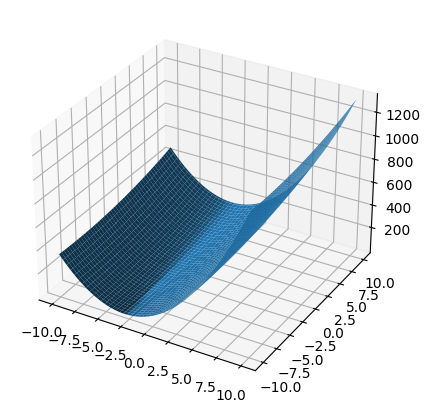

In [6]:
display(HTML("<h2>3.1. Квадратичная функция:</h2>"))
a = [7, 0.5]
b = [3, 7]
beautiful_function(a, b)

t = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f((X, Y), a, b))
print("", end="")

<IPython.core.display.Latex object>

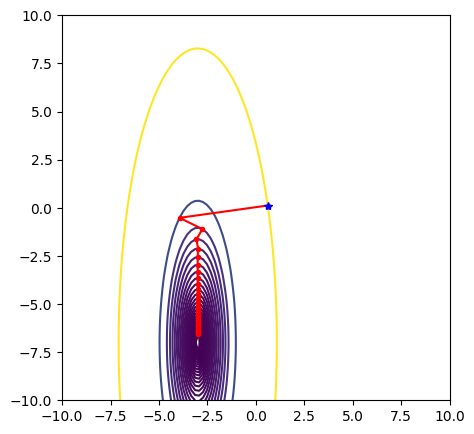

In [7]:
display(HTML("<h2>3.1.1. Градиентный спуск с постоянным шагом:</h2>"))
count, points = grad_desc(0.09, 40, a, b)

beautiful_matrix(points)
display(HTML("<h3>Количество высчитанных градиентов: " + str(count) + "</h2>"))
plt.contour(X, Y, f((X, Y), a, b), levels=sorted([f(p, a, b) for p in points]))
plt.plot(points[:, 0], points[:, 1], '.-', color="r")
plt.plot(points[0, 0], points[0, 1], '*', color="b")
print("", end="")

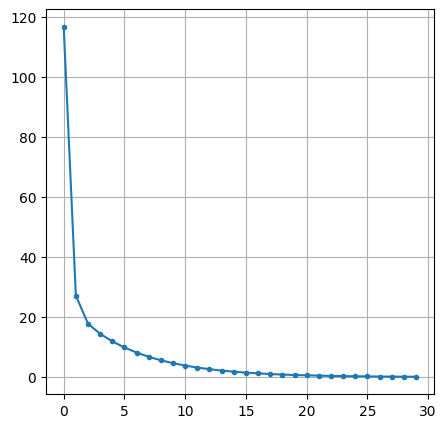

In [8]:
plt.plot(f(points.T, a, b), ".-")
plt.grid()
print("", end="")

<IPython.core.display.Latex object>

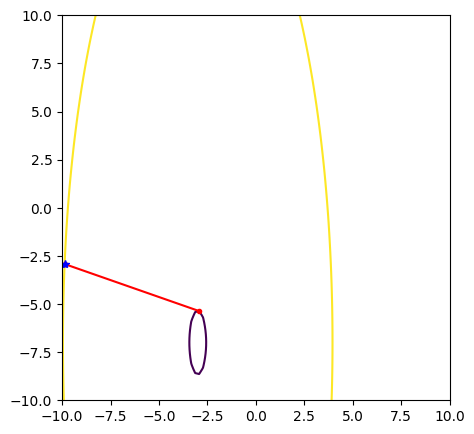

In [16]:
display(HTML("<h2>3.1.2. Градиентный спуск с одномерным поиском Фибоначчи:</h2>"))

count_f, count_grad, points = grad_desc_fib(a, b)

beautiful_matrix(points)

display(HTML("<h3>Количество высчитанных функций: " + str(count_f) + ";<br>Количество высчитанных градиентов: " + str(count_grad) + "</h2>"))

plt.contour(X, Y, f((X, Y), a, b), levels=sorted([f(p, a, b) for p in points]))
plt.plot(points[:, 0], points[:, 1], '.-', color="r")
plt.plot(points[0, 0], points[0, 1], '*', color="b")
print("", end="")

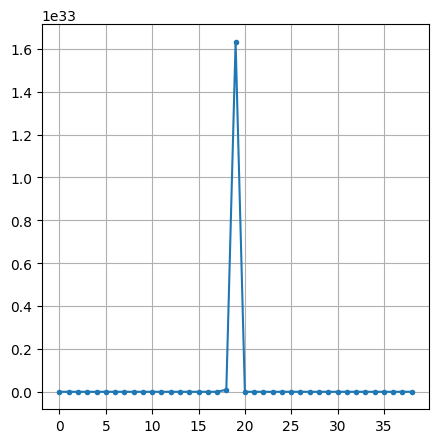

In [10]:
plt.plot(f(points.T, a, b), ".-")
plt.grid()
print("", end="")